In [24]:
import random
import matplotlib.pyplot as plt

class Creature():
    def __init__(self , species , species_number):
        self.points = 0
        self.species = species
        self.num = species_number
    def encounter(self , other):
        global reward_table
        self.points += reward_table[self.num][other.num]
        other.points += reward_table[other.num][self.num]

def random_assign_creatures_to_trees(m):
    global creatures
    
    # Shuffle the creatures to randomize their order
    random.shuffle(creatures)
    
    # Initialize the trees with empty slots
    trees = [[] for _ in range(m)]
    
    # Randomly assign creatures to trees
    for creature in creatures:
        # Select a random tree that has fewer than 2 creatures
        available_trees = [tree for tree in trees if len(tree) < 2]
        if available_trees:
            random.choice(available_trees).append(creature)
    
    return trees

def breed_and_survive(creature):

    global copy_creatures 
    #creature dies
    if creature.points == 0:
        copy_creatures.remove(creature)

    #50 percent chance of death for creature    
    elif creature.points == 0.5 and random.randint(0,1) == 0:
        copy_creatures.remove(creature)

    elif creature.points == 0.75 and random.randint(0,3) == 0:
        copy_creatures.remove(creature)
    
    elif creature.points == 1.25 and random.randint(0,3) == 0:
        copy_creatures.append(Creature(creature.species , creature.num))
    #50 percent chance of reproduction for creature
    elif creature.points == 1.5 and random.randint(0,1) == 0:
        copy_creatures.append(Creature(creature.species , creature.num))

    #creature live and reproduces
    elif creature.points == 2:
        copy_creatures.append(Creature(creature.species , creature.num))

    creature.points = 0

    creature.points = 0
        
def rewards(trees):
    for tree in trees:
        if len(tree) == 1:
            tree[0].points += 2
        if len(tree) == 2:
            tree[0].encounter(tree[1])

#count the number of hawks and doves and save them for future representation
def count_and_save():
    global creatures
    Dove_num = 0
    Hawk_num = 0
    bluffers_num = 0
    Dove_perc = 0
    Hawk_perc = 0
    bluffers_perc = 0
    for creature in creatures:
        if creature.species == "Dove":
            Dove_num += 1
        elif creature.species == "Hawk" :
            Hawk_num += 1
        else :
            bluffers_num += 1
    all_num = len(creatures)
    Dove_perc = Dove_num/all_num*100
    Hawk_perc = Hawk_num/all_num*100
    bluffers_perc = bluffers_num/all_num*100
    return Dove_num,Hawk_num,bluffers_num,Dove_perc,Hawk_perc,bluffers_perc

def simulation(reward_table):
    global creatures
    global copy_creatures
    reward_table = reward_table
    #create 1000 species 500 doves and 500 hawks
    Doves = [Creature("Dove" , 0) for i in range(100)]
    Hawks = [Creature("Hawk" , 1) for i in range(100)]
    bluffers = [Creature("Bluffers" , 2) for i in range(100)]
    creatures = []
    creatures.extend(Doves)
    creatures.extend(Hawks)
    creatures.extend(bluffers)
    random.shuffle(creatures)
    num_trees = 400 #amount of trees
    num_days = 100

    number_of_Doves = []
    number_of_Hawks = []
    number_of_bluffers = []
    Percentage_of_Doves = []
    Percentage_of_Hawks = []
    Percentage_of_bluffers = []
    days = [day for day in range(1, num_days+1)]
    #main loop
    for i in range(num_days):
        Dove_num,Hawk_num,bluffers_num,Dove_perc,Hawk_perc,bluffers_perc = count_and_save()
        number_of_Doves.append(Dove_num)
        number_of_Hawks.append(Hawk_num)
        number_of_bluffers.append(bluffers_num)
        Percentage_of_Doves.append(Dove_perc)
        Percentage_of_Hawks.append(Hawk_perc)
        Percentage_of_bluffers.append(bluffers_perc)
        trees = random_assign_creatures_to_trees(num_trees)
        rewards(trees)
        copy_creatures = creatures.copy()
        for creature in creatures :
            breed_and_survive(creature)
        creatures = copy_creatures.copy()

    # Plot
    plt.figure()
    plt.plot(days, number_of_Doves, label='Doves')
    plt.plot(days, number_of_Hawks, label='Hawks')
    plt.plot(days, number_of_bluffers, label='Bluffers')
    plt.grid()
    plt.xlabel("Number of Days")
    plt.ylabel("Number of Creatures")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(days, Percentage_of_Doves, label='Doves')
    plt.plot(days, Percentage_of_Hawks, label='Hawks')
    plt.plot(days, Percentage_of_bluffers, label='Bluffers')
    plt.grid()
    plt.xlabel("Number of Days")
    plt.ylabel("Creature Percentage %")
    plt.legend()
    plt.show()
reward_table = [[1,0.5,0.5], [1.5,0,1.5],[1.5,0,0.5]] # Dove , Hawk , bluffer // Dove , Hawk , bluffer

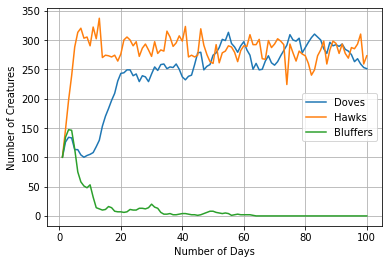

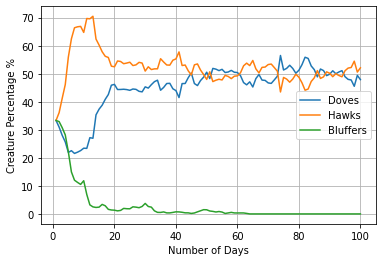

In [25]:
reward_table = [[1,0.5,0.5], [1.5,0,1.5],[1.5,0,0.5]] # Dove , Hawk , bluffer // Dove , Hawk , bluffer
simulation(reward_table)

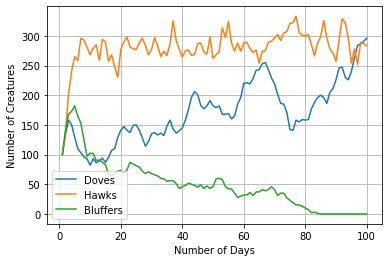

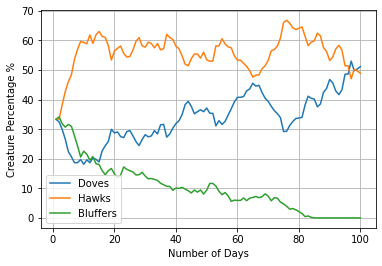

In [30]:
reward_table = [[1,0.5,0.5], [1.5,0,1.5],[1.5,0,1]] # Dove , Hawk , bluffer // Dove , Hawk , bluffer
simulation(reward_table)

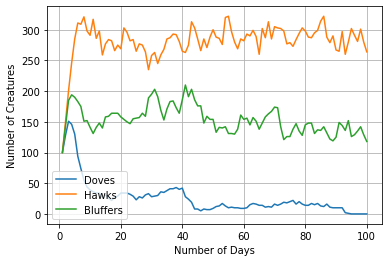

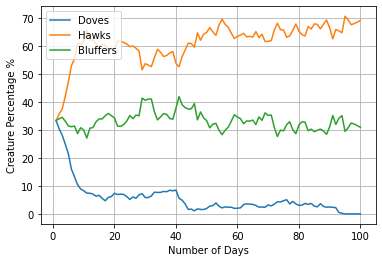

In [23]:
reward_table = [[1,0.5,0.5], [1.5,0,1.5],[1.5,0.5,0.5]] # Dove , Hawk , bluffer // Dove , Hawk , bluffer
simulation(reward_table)

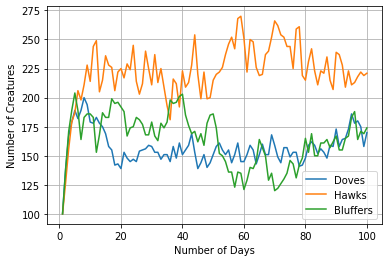

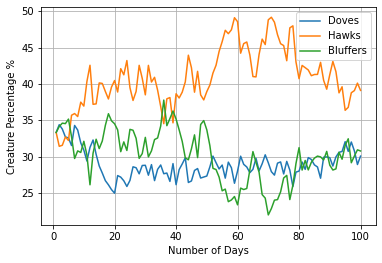

In [33]:
reward_table = [[1,0.5,0.75], [1.5,0,1],[1.25,0.5,0.5]] # Dove , Hawk , bluffer // Dove , Hawk , bluffer
simulation(reward_table)